<div class="alert alert-success">
<font color='black'>    
<br><b>Проект по А/B-тестированию.</b>   
<br><b>Цель исследования:</b>провести оценку результатов A/B-теста. В распоряжении есть датасет с действиями пользователей, техническое задание и несколько вспомогательных датасетов.
<br><b>Задачи:</b>    
<br>- Провести исследовательский анализ данных;
<br>- Сегментировать пользователей на основе данных о количестве потребляемых продуктов;
<br>- Сформулируйте и проверьте статистические гипотезы:
      <br>-Проверить гипотезу различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые       <br>пользуются одним;
      <br>-Проверить гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые         <br>пользуются одним
<br>- Визуализировать исследование с помощью дашборда и презинтации;</font></div>

<div class="alert alert-success">
<font color='black'>    
<br><b>Структура исследования:</b>
<br>1) Загрузить данные и изучить общую информацию;    
<br>2) Выполнить предобработку данных;
<br>2.1 Проверить данные на пропуски, наличие дубликатов и выбросов   
<br>3) Провести исследовательский анализ данных:
<br>3.1 Анализ средних значений для клиентов по городам и факту оттока;
<br>3.2 Анализ влияния признаков на отток, гистограммы и распределение признаков;
<br>3.3 Построение матрицы корреляции признаков;    
<br>4) Сегментация пользователей по количеству используемых банковских продуктов;    
<br>5) Проверить статистические гипотезы:
<br>5.1 Н0-Доходы между клиентами которые пользуются двумя продуктами банка и теми кто пользуются одним одинаковы;
      <br> Н1-Доходы между клиентами которые пользуются двумя продуктами банка и теми кто пользуются одним отличаются;
<br>5.2 Н0-Возраст между клиентами которые пользуются двумя продуктами банка и теми кто пользуются одним одинаковы;
      <br> Н1-Возраст между клиентами которые пользуются двумя продуктами банка и теми кто пользуются одним отличается;
<br>6) Выводы и рекомендации;
<br>7) Визуальное дополнение к исследованию: дашборд и презентация
<br><b>План презентации:</b>
<br> - Анализ влияния признаков на отток;
<br> - Сегментация пользователей по количеству используемых банковских продуктов;
<br> -Проверка гипотез;
<br> - Выводы и рекомендации.</font></div>

# Дополнительные материалы: 
<br> Дашборд - https://public.tableau.com/app/profile/valery.gondusov/viz/_16868992265420/Dashboard1
<br>Презентация -https://disk.yandex.ru/i/-704hl2L1iRHRw

In [1]:
! pip install phik

### Загрузка данных и изучение общей информации

In [2]:
import pandas as pd     # Импортируем необходимые библиотеки
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import warnings 
warnings.filterwarnings('ignore')                 
from scipy import stats as st
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix
from matplotlib.ticker import PercentFormatter

In [3]:
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_dataset.csv')
except:
    data = pd.read_csv('\test\datasets\bank_dataset.csv')

In [4]:
display(data.head())

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.columns = data.columns.str.lower()# приведем названия заголовков к нижнему регистру
data = data.rename(columns={'creditcard': 'credit_card', 'userid' : 'user_id'})# изменим названия на более удобные

In [6]:
display(data.head())#проверим результат преобразования

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.info()#проверим общую информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
user_id,10000.0,1.573368e+07,71936.186123,15608437.00,1.567126e+07,1.573347e+07,1.579597e+07,15858426.00
score,10000.0,6.505288e+02,96.653299,350.00,5.840000e+02,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,3.200000e+01,3.700000e+01,4.400000e+01,92.00
objects,10000.0,5.012800e+00,2.892174,0.00,3.000000e+00,5.000000e+00,7.000000e+00,10.00
balance,6383.0,1.198275e+05,30095.056462,3768.69,1.001820e+05,1.198397e+05,1.395123e+05,250898.09
products,10000.0,1.530200e+00,0.581654,1.00,1.000000e+00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.00
loyalty,10000.0,5.151000e-01,0.499797,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,5.100211e+04,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.00


In [9]:
data['city'].value_counts()

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

In [10]:
data['objects'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: objects, dtype: int64

In [11]:
data['products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: products, dtype: int64

<div class="alert alert-success">
<font color='black'>    
Датасет содержит информацию о 10 000 клиентов банка. Структура данных: идентификатор пользователя, баллы кредитного скоринга, город, пол, возраст, количество объектов в собственности, баланс на счете, количество продуктов, которыми пользуется клиент, есть ли кредитная карта, активный клиент, примерная заработная плата клиента, факт оттока. Банк представлен в городах Ярославль, Ростов Великий и Рыбинск. Возраст клиентов колеблется от 18 до 92 лет. Все клиенты пользуются продуктами банка (минимум одним, максимум - четырьмя), 71% клиентов имеют кредитную карту банка, половина из общего числа клиентов не является активными, отток клиентов составляет - 20%.
<br> Все типы данных соответствуют своим целям.</font></div>

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера:</b> Данные изучены
</div>

### Предобработка данных

#### Проверка данных на дубликаты

In [12]:
print('Количество дубликатов:', data.duplicated().sum())
print('Количество уникальных пользователей:', data['user_id'].nunique())

Количество дубликатов: 0
Количество уникальных пользователей: 10000


#### Проверка данных на выбросы

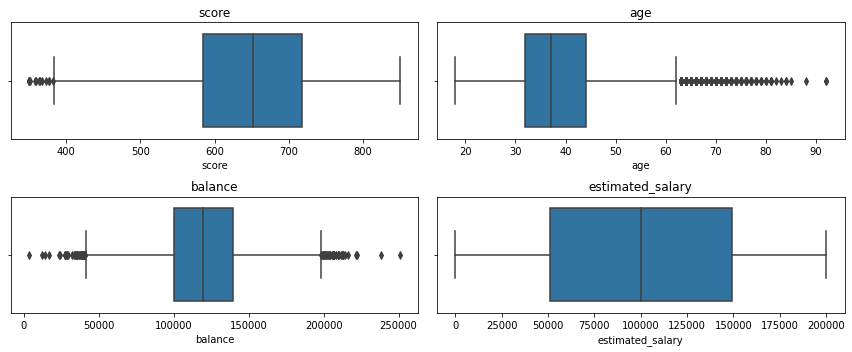

In [13]:
emissions = ['score', 'age',\
          'balance', 'estimated_salary']
col_count, row_count = 2, 2

plt.figure(figsize=(12, 5))

for i, emission in enumerate(emissions):
    sns.boxplot(x=data[emission], data=data,\
                ax = plt.subplot(row_count, col_count, i + 1))
    plt.title(emission)
plt.tight_layout()    
plt.show()

<div class="alert alert-success">
<font color='black'>    
Выбросов, которые могут повлиять на результат исследования не наблюдается. На возрастном графике есть выбросы в большую сторону, но это клиенты пожилого возраста и данные по ним так же нужны для дальнейшего исследования.</font></div>

#### Проверка данных на пропуски

In [14]:
data.isna().sum()

user_id                0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

In [15]:
display(data[data['balance'].isnull()].head(10))#сформируем данные таблицы с клиентами, у которых не заполнено значение balance

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0
13,15734219,549,Ярославль,Ж,25,5,NaN,2,0,0,190857.79,0
14,15643618,635,Рыбинск,Ж,35,7,NaN,2,1,1,65951.65,0
17,15830954,549,Рыбинск,Ж,24,9,NaN,2,1,1,14406.41,0
18,15704243,587,Рыбинск,М,45,6,NaN,1,0,0,158684.81,0
19,15611718,726,Ярославль,Ж,24,6,NaN,2,1,1,54724.03,0


In [16]:
display(data[data['balance'].notnull()].head(10))#сформируем данные таблицы с клиентами, у которых заполнено значение balance

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0
10,15810557,528,Ярославль,М,31,6,102016.72,2,0,0,80181.12,0
15,15686702,616,Ростов Великий,М,45,3,143129.41,2,0,1,64327.26,0
16,15780188,653,Ростов Великий,М,58,1,132602.88,1,1,0,5097.67,1


In [17]:
data[data['balance'].notnull()].describe()#посмотрим на статистические показатели

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,6.383000e+03,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000
mean,1.573310e+07,651.138493,39.197713,4.979633,119827.493793,1.386025,0.699201,0.513552,100717.352956,0.240796
std,7.192913e+04,96.934609,10.476208,2.909514,30095.056462,0.577011,0.458641,0.499855,57380.316584,0.427600
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.567094e+07,584.000000,32.000000,2.000000,100181.975000,1.000000,0.000000,0.000000,51736.850000,0.000000
50%,1.573226e+07,652.000000,38.000000,5.000000,119839.690000,1.000000,1.000000,1.000000,101139.300000,0.000000
75%,1.579584e+07,718.000000,44.000000,8.000000,139512.290000,2.000000,1.000000,1.000000,149596.615000,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000


In [18]:
data[data['balance'].isnull()].describe()#посмотрим на статистические показатели

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,3.617000e+03,3617.000000,3617.000000,3617.000000,0.0,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000
mean,1.573469e+07,649.452861,38.434891,5.071330,NaN,1.784628,0.716616,0.517832,98983.559549,0.138236
std,7.194749e+04,96.158798,10.492002,2.860781,NaN,0.496455,0.450704,0.499751,57730.828955,0.345195
min,1.560844e+07,350.000000,18.000000,0.000000,NaN,1.000000,0.000000,0.000000,90.070000,0.000000
25%,1.567226e+07,583.000000,31.000000,3.000000,NaN,1.000000,0.000000,0.000000,49506.820000,0.000000
50%,1.573608e+07,651.000000,37.000000,5.000000,NaN,2.000000,1.000000,1.000000,98618.790000,0.000000
75%,1.579629e+07,717.000000,43.000000,7.000000,NaN,2.000000,1.000000,1.000000,148330.970000,0.000000
max,1.585810e+07,850.000000,88.000000,10.000000,NaN,4.000000,1.000000,1.000000,199992.480000,1.000000


<div class="alert alert-success">
<font color='black'>    
Значимой разницы в статистических показателях с наличием и отсутствием пропусков в колонке с "balance" не наблюдается. Немного отличаются медианное значение и стандартное отклонение для количества продуктов и оттока.
<br>Cложно сказать, чем вызваны пропуски в колонке "balance", скорее всего это связано с особенностями продуктов, так как не до конца ясно это баланс дебетового счета или кредитного, поэтому оставим пропуски без изменений.</font></div>

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера:</b> Верное решение
</div>

### Исследовательский анализ данных

#### Анализ средних значений для клиентов по городам и факту оттока

In [19]:
data_1 = data.drop('user_id', axis=1).groupby(['city', 'churn']).mean()
display(data_1)

score        age   objects        balance  \
city           churn                                                   
Ростов Великий 0      653.261357  37.311504  5.011799  119427.106696   
               1      647.689189  44.894349  5.006143  120361.075590   
Рыбинск        0      652.104167  37.839147  5.107558  119820.561722   
               1      647.484262  44.147700  4.656174  119792.058240   
Ярославль      0      651.162226  37.235966  5.005471  119484.839826   
               1      641.914815  45.133333  5.000000  121915.781268   

                      products  credit_card   loyalty  estimated_salary  
city           churn                                                     
Ростов Великий 0      1.551032     0.716224  0.561652     102414.657876  
               1      1.454545     0.708845  0.363636      98403.886450  
Рыбинск        0      1.544574     0.699128  0.567345      98602.369864  
               1      1.513317     0.673123  0.341404     103629.554818  
Ярославль      0      1.541389     0.707422  0.545433      99217.097331  
               1      1.476543     0.702469  0.367901     103439.278296

<div class="alert alert-success">
<font color='black'>    
<b>Анализируя таблицу можно сделать вывод:</b>
<br> - Показатели уровня кредитного скоринга по городам в сапоставимых значениях, но у "отточных" клиентов он ниже;
<br> - Возрастное распределение по городам и у "отточных" клиентов одинаковое;
<br> - По количеству объектов в собственности сопоставимые значения, но у "отточных" клиентов из Рыбинска - среднее количество ниже на 0,5 в сравнении с другими группами;
<br> - Стоит отметить, что у "отточных" клиентов более высокий средний баланс;
<br> - Различий в среднем количестве, используемых продуктов по группам не наблюдается;
<br> - Наличие кредитной карты как и активность клиентов в среднем на одном уровне не зависимо от города и факта оттока;
<br> - По уровеню примерной заработной платы сопоставимые значения по городам, но в Ростове Великом он выше для клиентов, которые остаются с банком, а для Ярославля и Рыбинска выше для "отточных" клиентов.</font></div>

#### Анализ влияния признаков на отток, гистограммы и распределение признаков

In [20]:
data_2 = data

In [21]:
data_2

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


In [22]:
data_2['gender'] = data_2['gender'].map({'М':1, 'Ж':0})
data_2['city_int'] = data_2['city'].map({'Ярославль':0, 'Рыбинск':1, 'Ростов Великий':2})

# преобразуем датафрейм методом get_dummies(), чтобы разделить столбец 'city' на отдельные столбцы для каждого города

data_2 = pd.get_dummies(data_2)

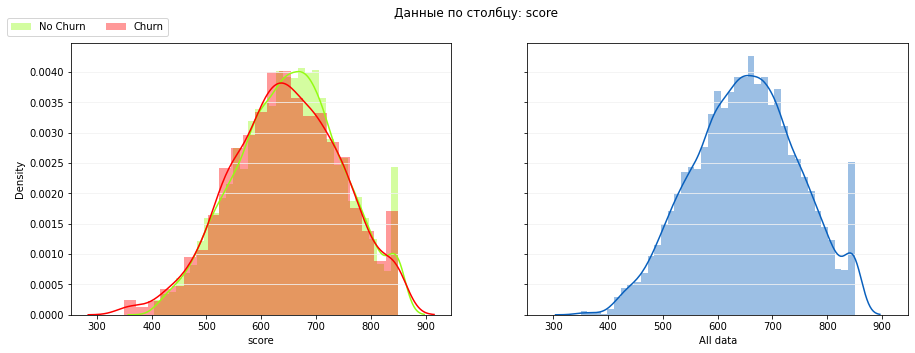

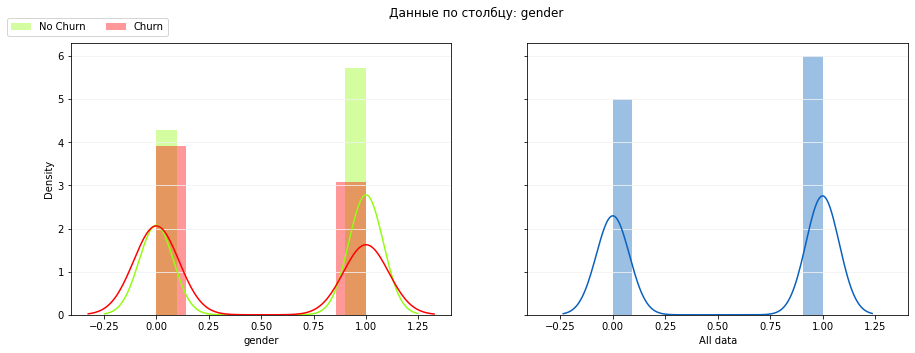

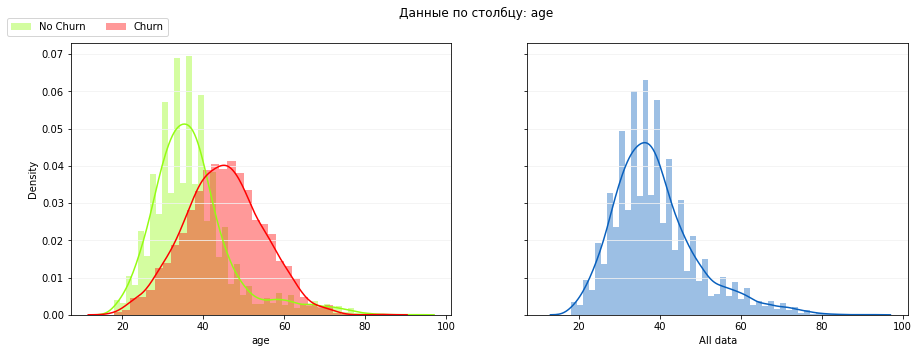

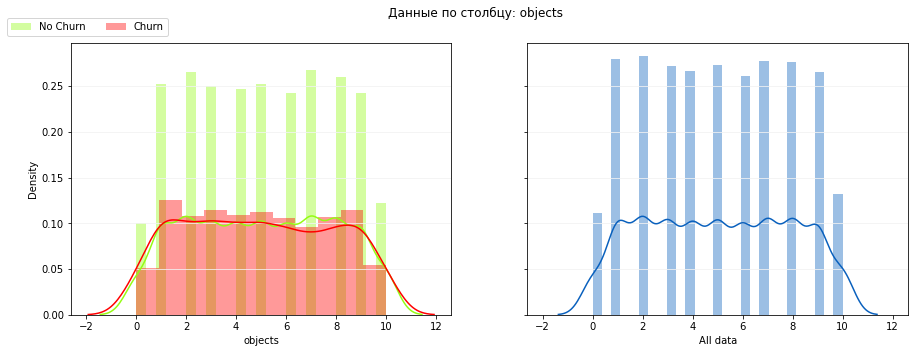

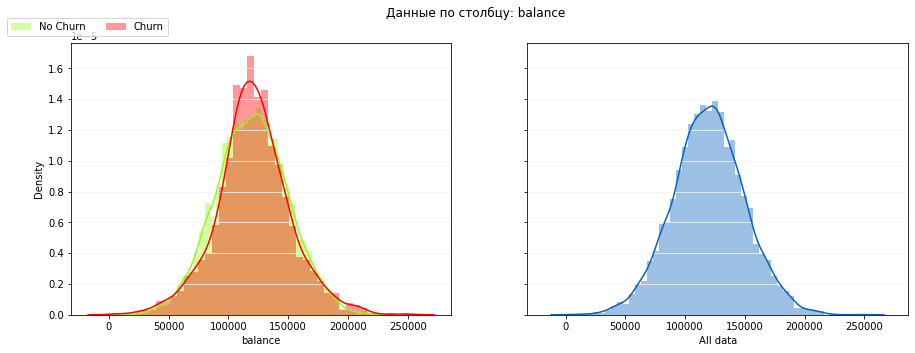

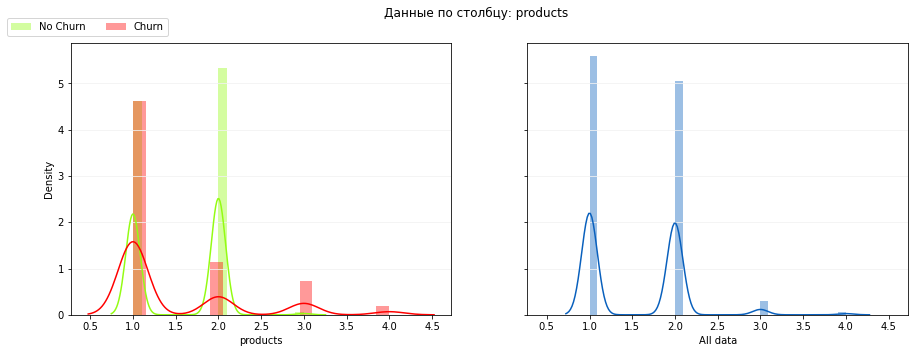

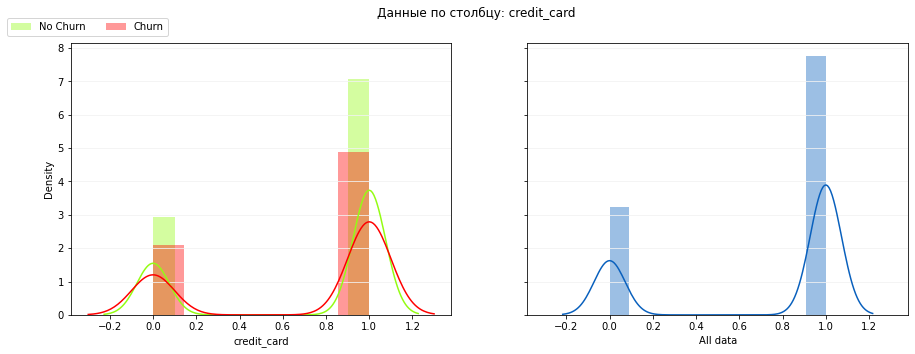

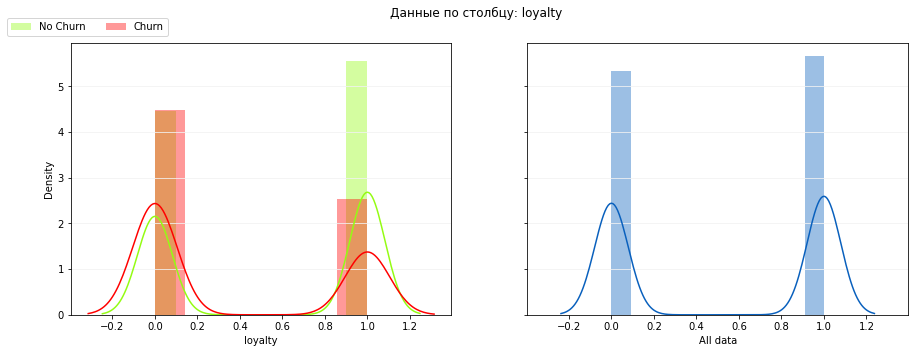

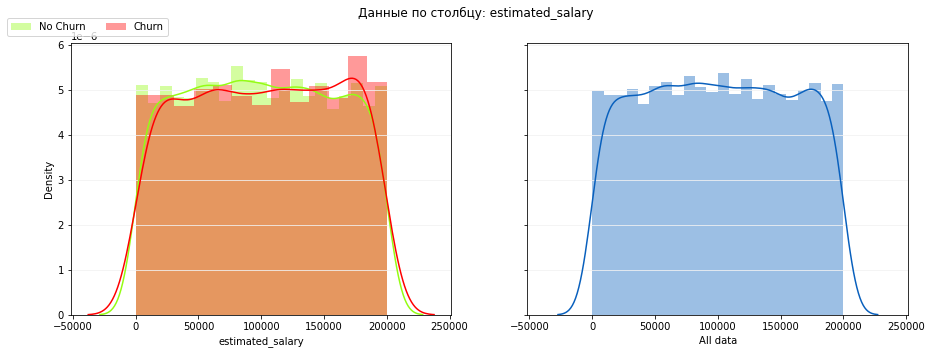

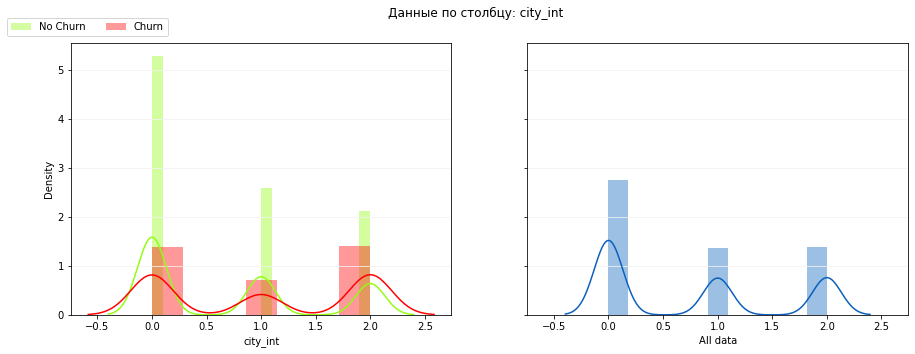

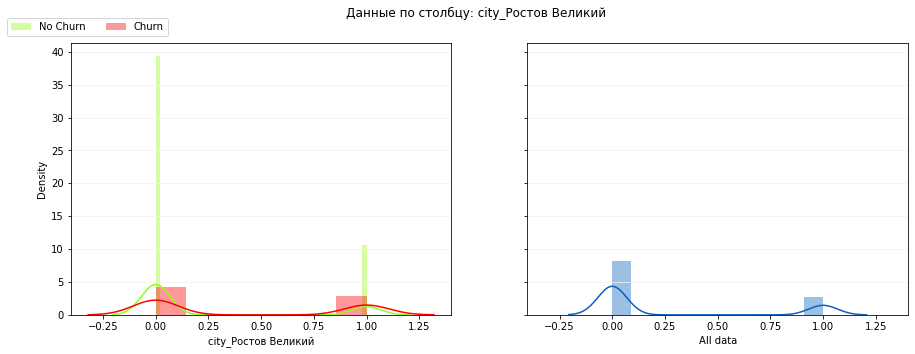

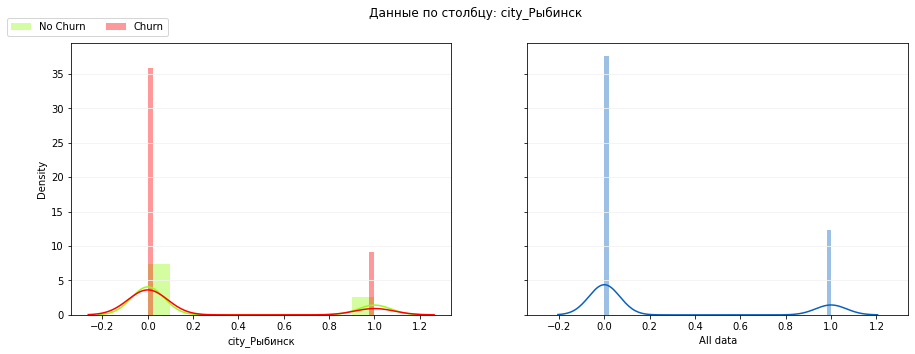

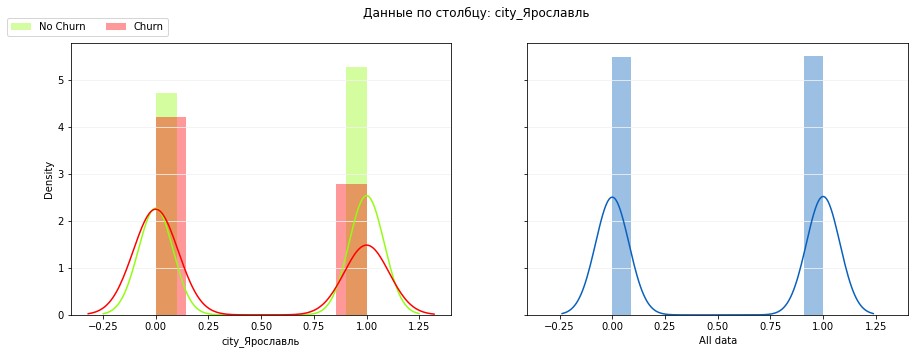

In [23]:
columns = data_2.drop(['churn', 'user_id'], axis=1).columns
for col in columns:
    x1 = data_2[data_2['churn']==0][col]
    x2 = data_2[data_2['churn']==1][col]
    x3 = data_2[col]
# plot
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)
    fig.suptitle('Данные по столбцу: ' + col)
    sns.distplot(x1 , color="#94fc13", ax=axes[0], label='No Churn')
    sns.distplot(x2 , color="#ff0000", ax=axes[0], label = 'Churn')
    sns.distplot(x3 , color="#0960bd", ax=axes[1], axlabel='All data')
    fig.legend(bbox_to_anchor=(0.066, 0.9), loc='lower left', ncol=2, borderaxespad=0.)
    axes[0].set(ylabel='Density')
    axes[0].grid(axis='y', color='0.95')
    axes[1].grid(axis='y', color='0.95')
    plt.show()

<div class="alert alert-success">
<font color='black'>    
<b>Анализируя графики можно сделать вывод:</b>
<br> Такие признаки,  как: баллы кредитного скоринга, количество объектов в собственности, примерная заработная зарплата клиента - не оказывают существенного влияния на факт оттока клиентов.
<br>Но стоит отметить, что такие признаки как: возраст клиента, количество используемых продуктов и баланс лицевого счета, возможно оказывают некое влияние на отток.
<br> - Cреди женщин процент "отточных клиентов" выше, чем среди мужчин;
<br> - Клиенты, использующие более 2-х продуктов уходят в отток больше всего;
<br> - Среди не активных клиентов отток ожидаемо выше;
<br> - По наличию кредитной карты отношение "отточных" клиентов и тех, кто остался на сапоставимых уровнях.</font></div>

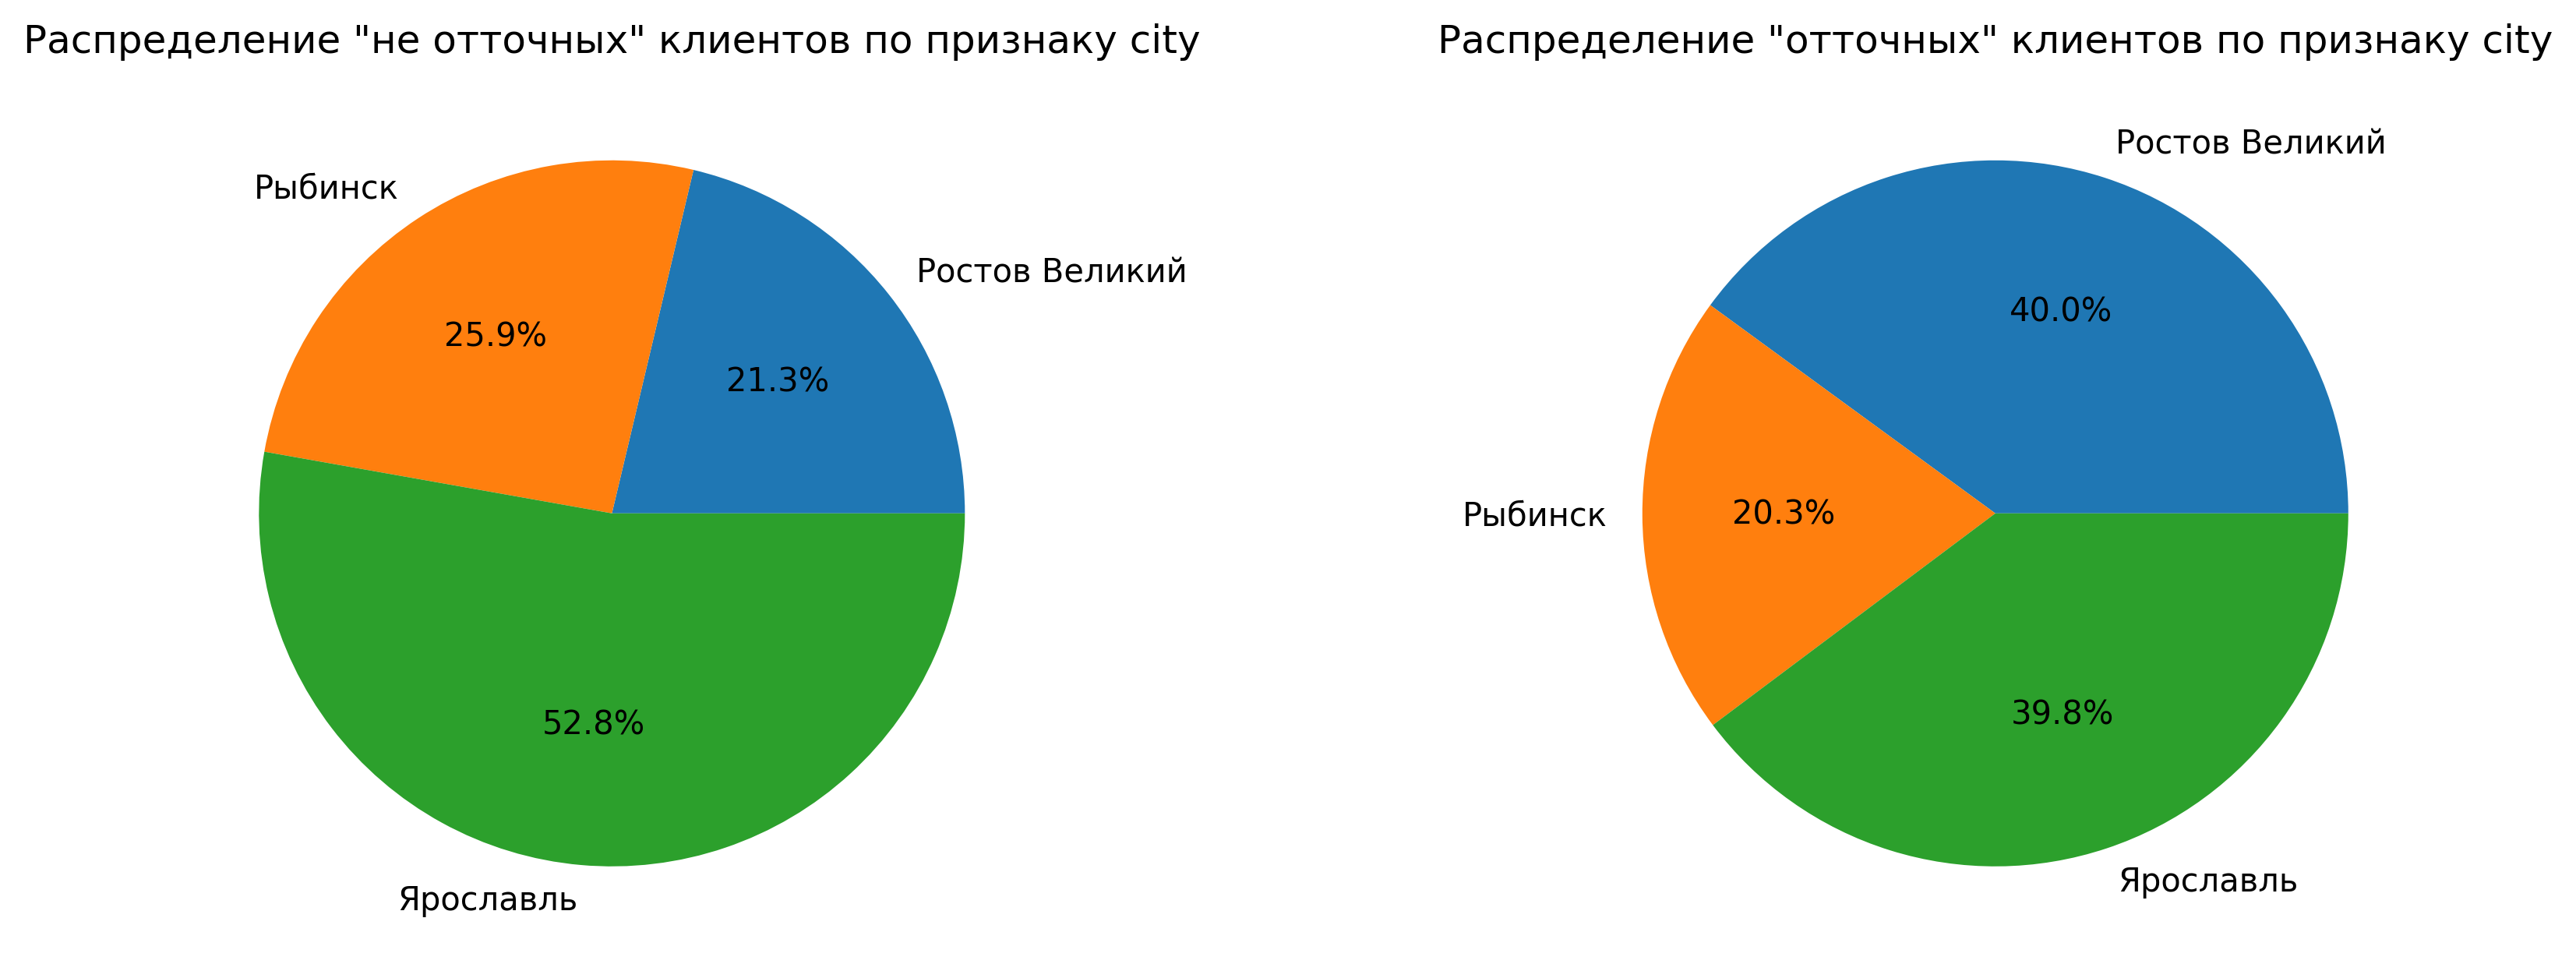

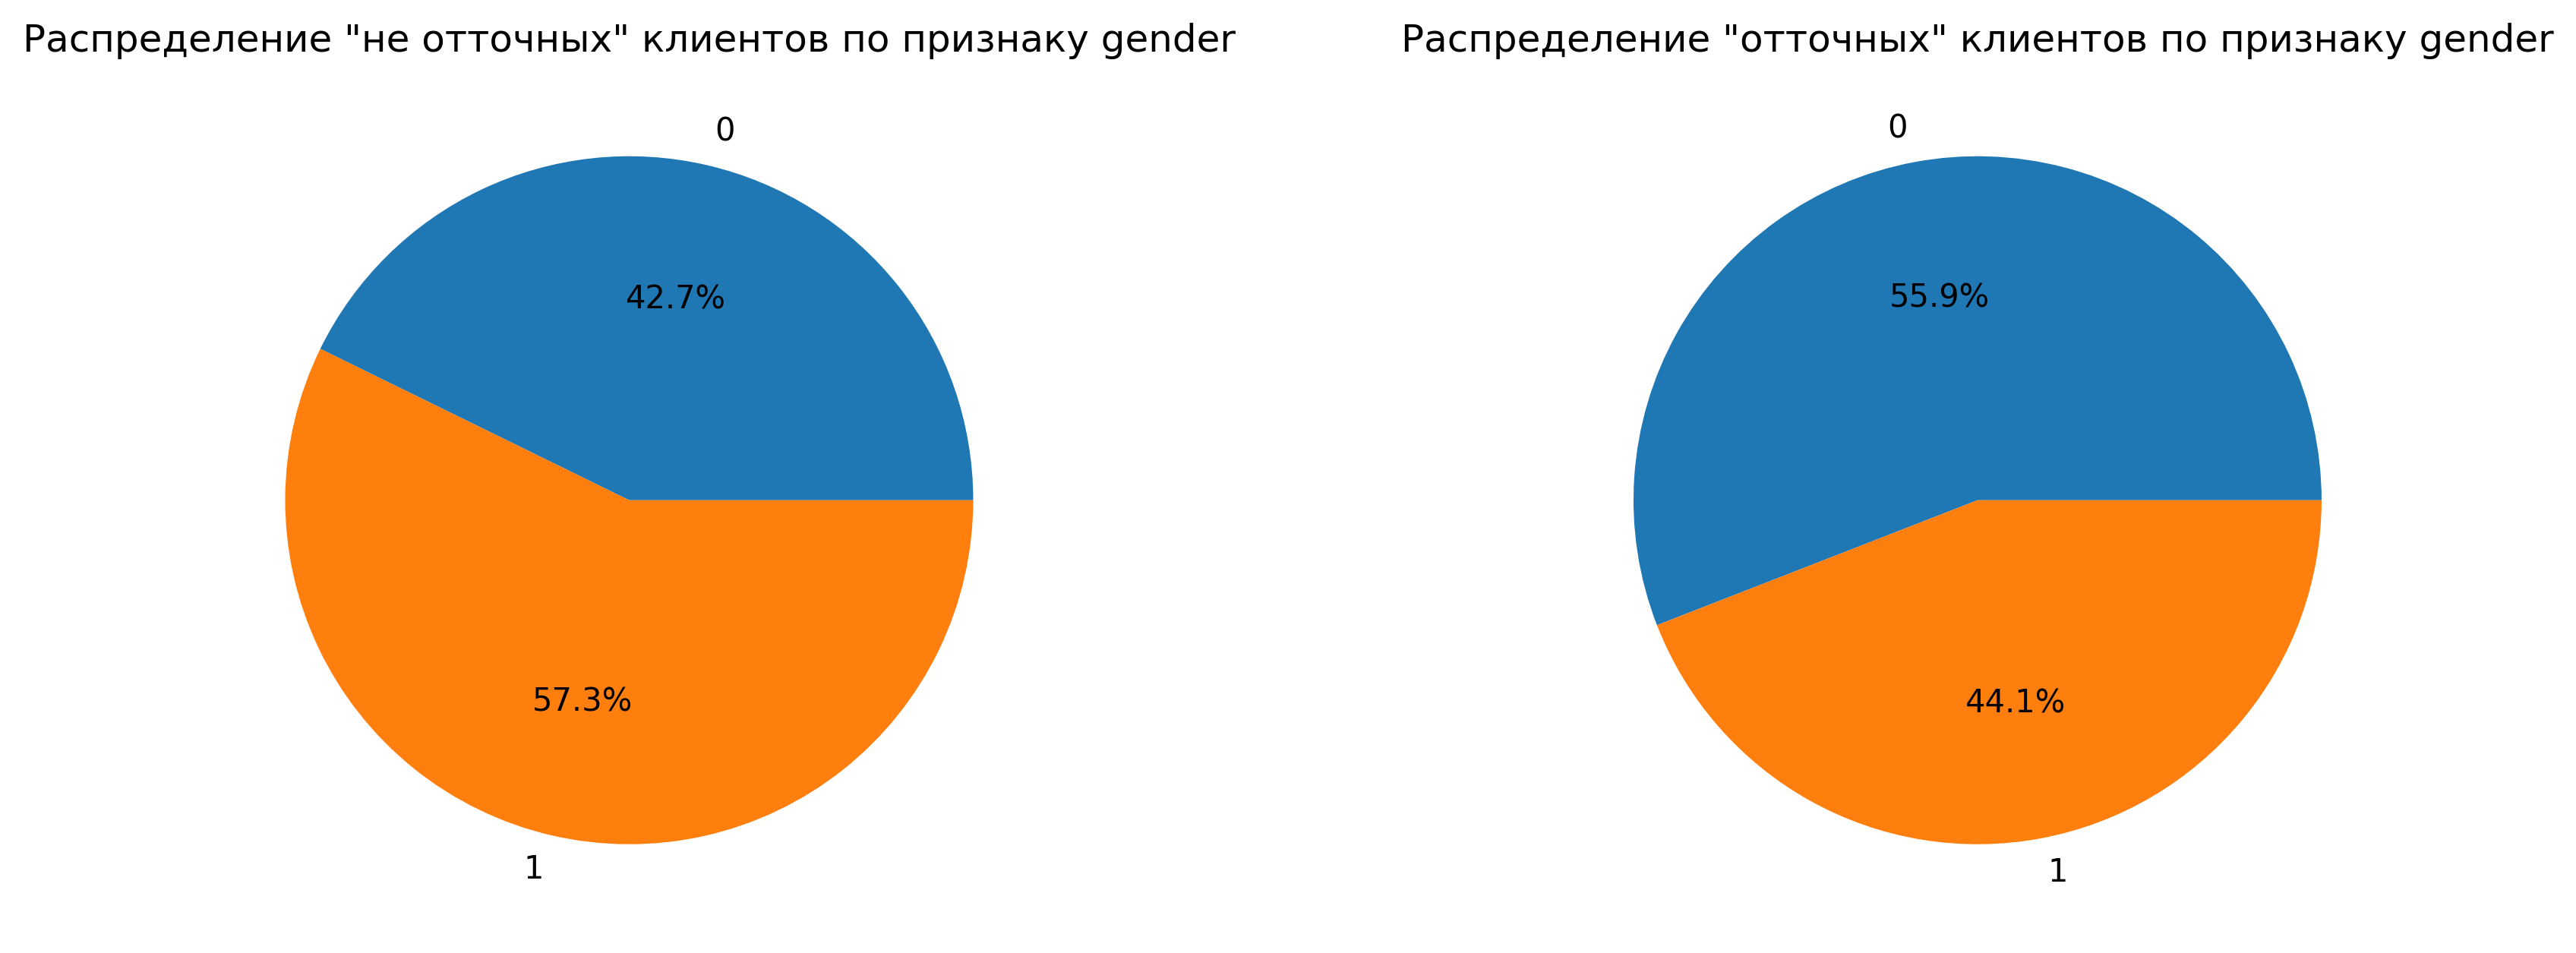

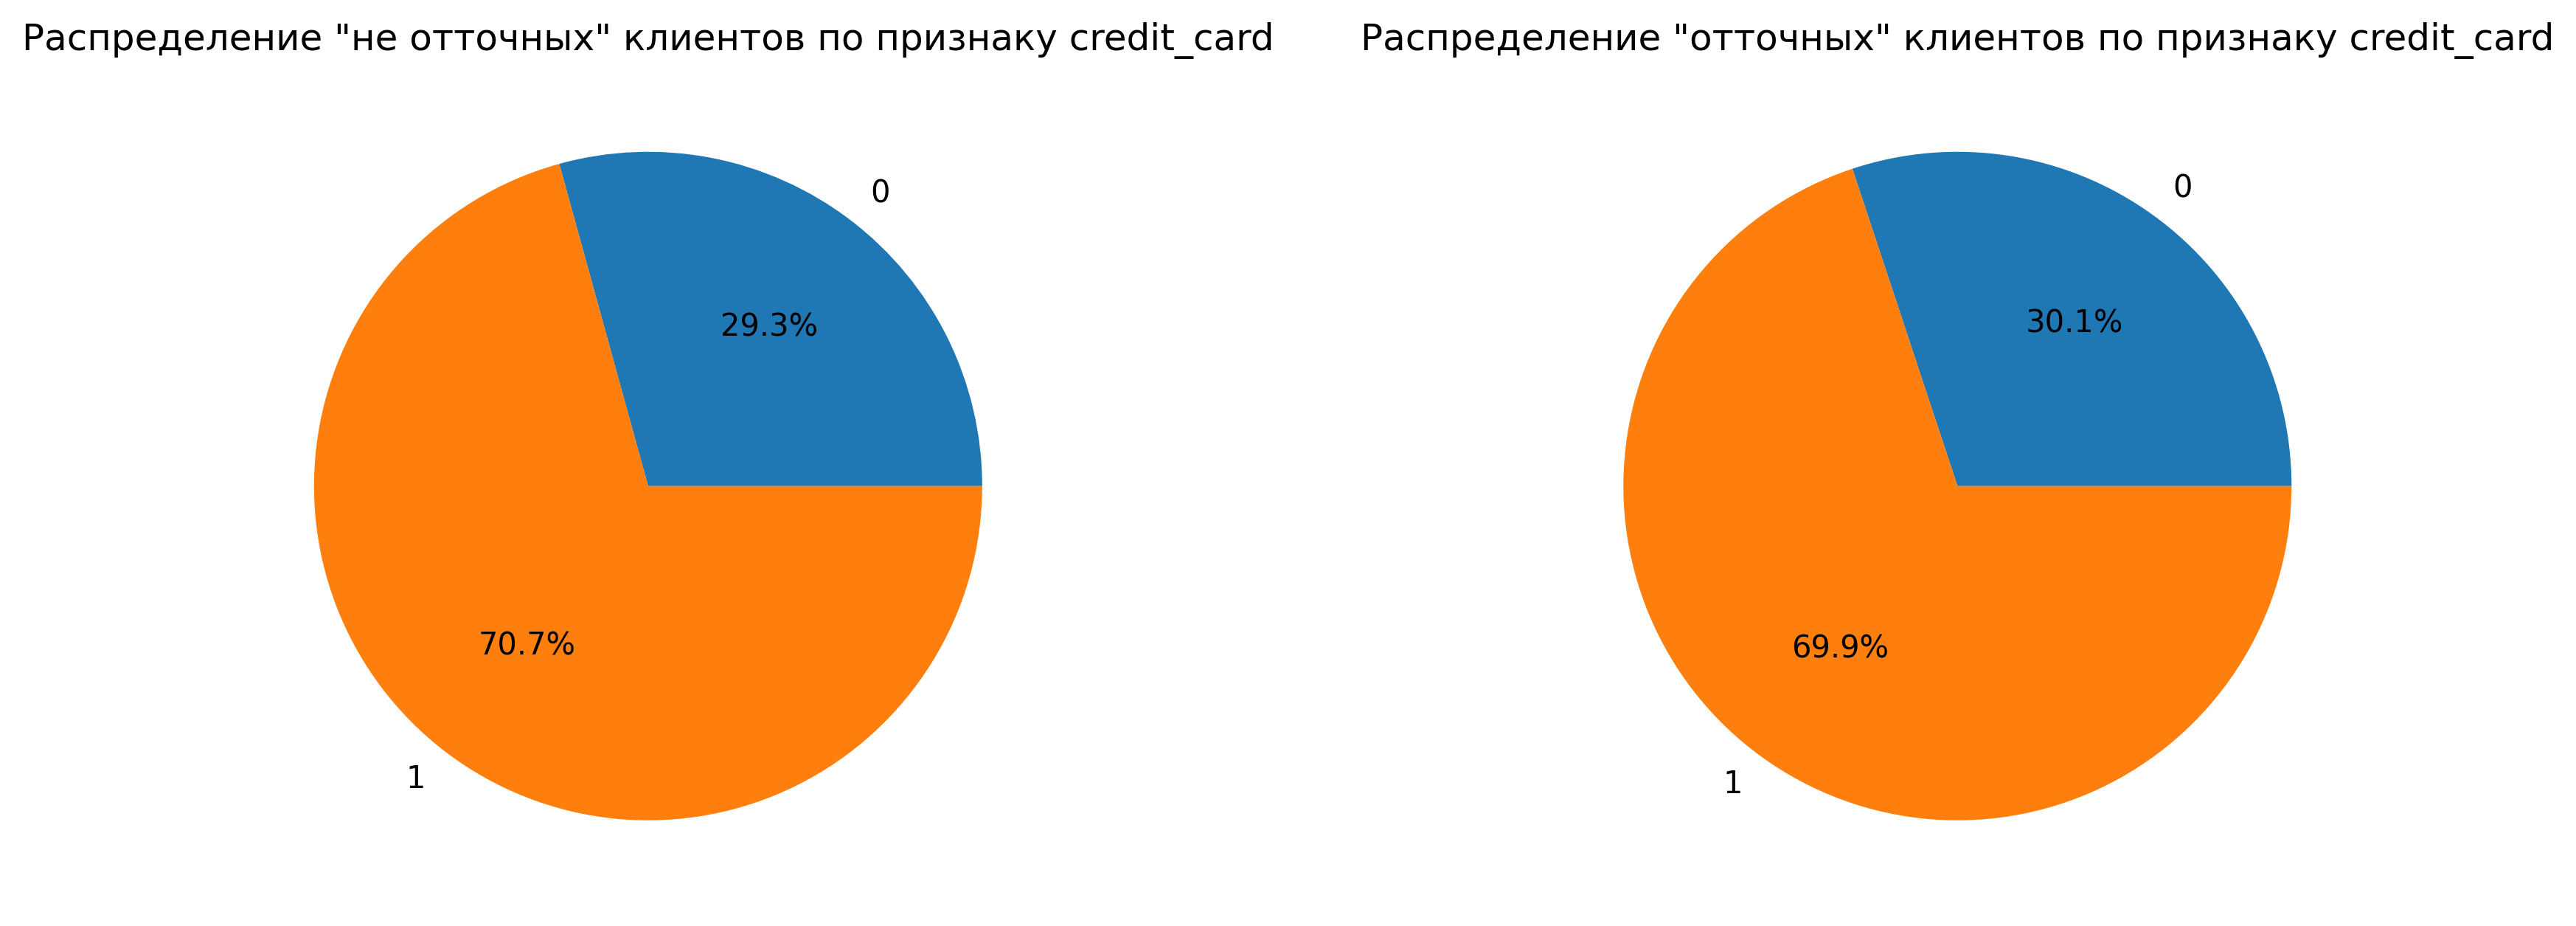

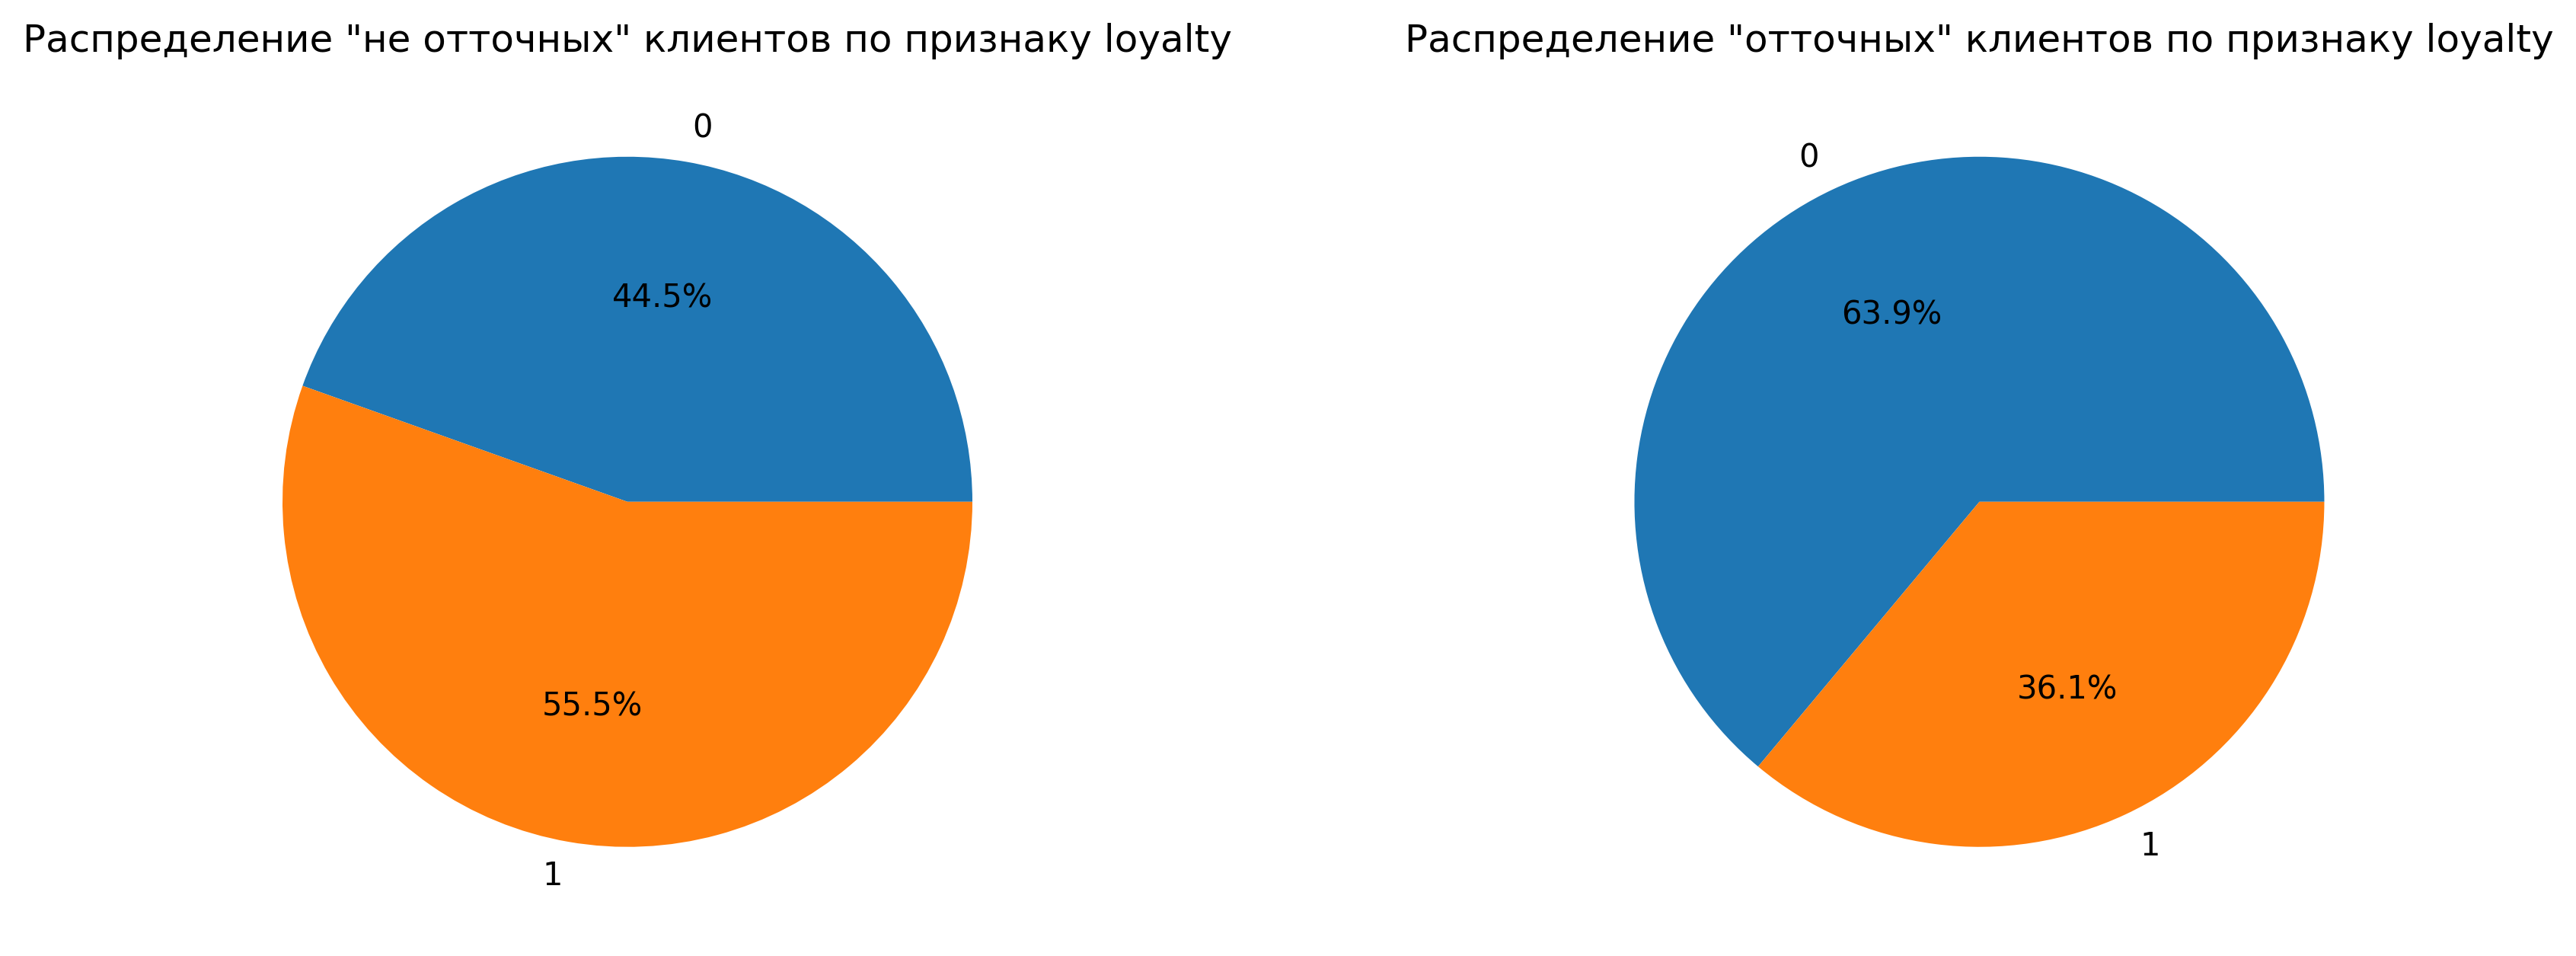

In [24]:
for column in ['city','gender','credit_card','loyalty']:
    df_5 = data[data['churn']==0].groupby(column).agg({'user_id': 'count'})
    df_6 = data[data['churn']==1].groupby(column).agg({'user_id': 'count'})
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5), dpi=300, gridspec_kw={'width_ratios': [1, 1.5]})
    ax1.pie(df_5['user_id'], labels=df_5.index, autopct='%1.1f%%')
    ax1.set_title(f'Распределение "не отточных" клиентов по признаку {column}')
    ax2.pie(df_6['user_id'], labels=df_6.index, autopct='%1.1f%%')
    ax2.set_title(f'Распределение "отточных" клиентов по признаку {column}')
    plt.show() 

#### Построение матрицы корреляции признаков

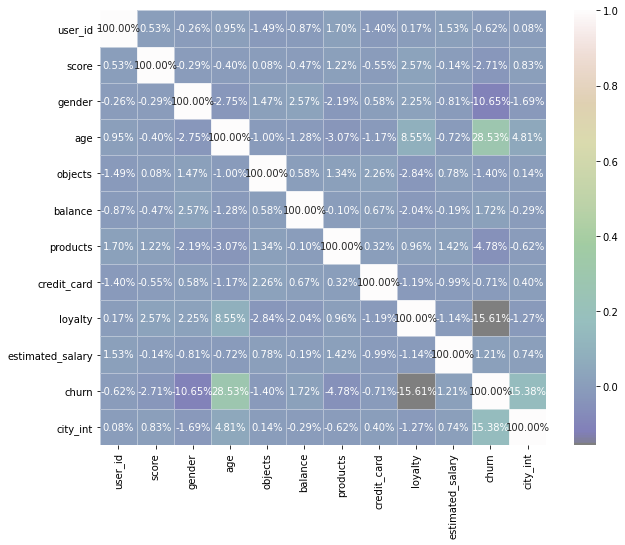

In [25]:
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax, cmap='gist_earth',fmt='.2%', alpha=.5)
plt.show()

In [26]:
data_new = pd.get_dummies(data, columns=['gender', 'city'])  # применили унитарное кодирование (One Hot Encoding)
data_new.head()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_int,gender_0,gender_1,city_Ростов Великий,city_Рыбинск,city_Ярославль
0,15677338,619,42,2,NaN,1,1,1,101348.88,1,0,1,0,0,0,1
1,15690047,608,41,1,83807.86,1,0,1,112542.58,0,1,1,0,0,1,0
2,15662040,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0,0,1
3,15744090,699,39,1,NaN,2,0,0,93826.63,0,0,1,0,0,0,1
4,15780624,850,43,2,125510.82,1,1,1,79084.10,0,1,1,0,0,1,0


interval columns not set, guessing: ['user_id', 'score', 'age', 'objects', 'balance', 'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn', 'city_int', 'gender_0', 'gender_1', 'city_Ростов Великий', 'city_Рыбинск', 'city_Ярославль']


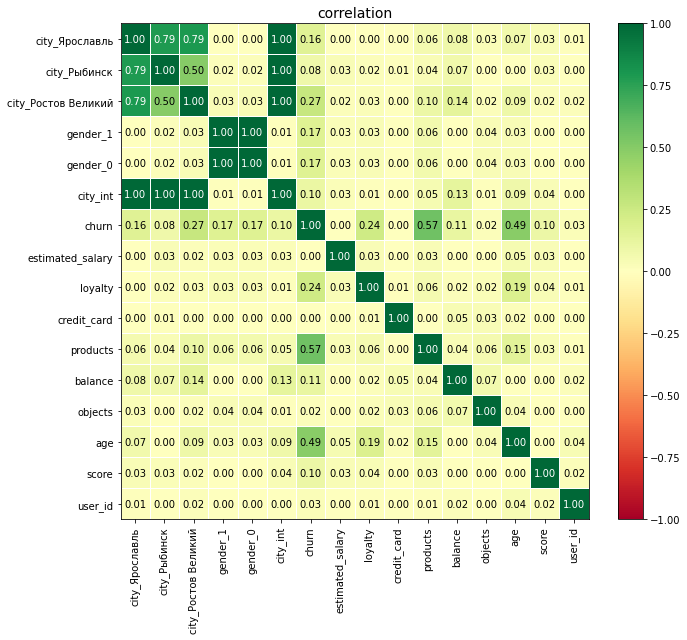

In [27]:
phik_overview = data_new.phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        figsize=(10, 9)
                       )
plt.tight_layout()

<div class="alert alert-success">
<font color='black'>    
<b>Анализируя тепловую карту можно сделать вывод:</b>
<br>- Сильно влияющих на отток признаков нет;
<br>- Можно отметить некую корреляцию с возрастом клиента (age) - чем он выше, тем больше вероятность оттока;
<br>- Так же следует 'loyalty' - менее активные клиенты с большей вероятностью станут "отточными"
<br>- Отмечена высокая корреляция оттока к городу и полу.
</font></div>

### Сегментация пользователей по количеству используемых банковских продуктов

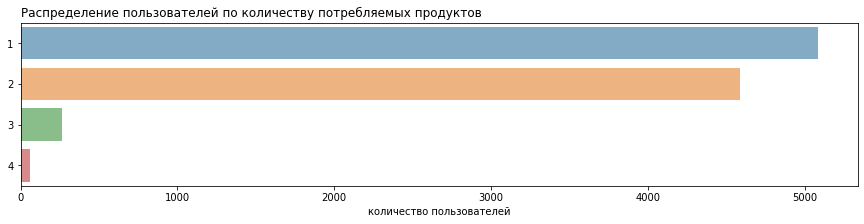

In [28]:
plt.figure(figsize=(15, 3))
ax = sns.barplot(x='count', 
                 y='products', 
                 data=data.groupby('products').agg(count=('user_id','count')).reset_index(), 
                 orient='h', alpha=0.6)
ax.set_title('Распределение пользователей по количеству потребляемых продуктов', loc='left')
ax.set_xlabel('количество пользователей') 
ax.set_ylabel('')
#plt.grid(b=True)
plt.show()

<div class="alert alert-block alert-danger">
    <b> ❌ Комментарий ревьюера 7:</b> Ошибка кода
</div>

In [29]:
data.groupby('products').agg('mean')

,user_id,score,gender,age,objects,balance,credit_card,loyalty,estimated_salary,churn,city_int
products,,,,,,,,,,,
1,1.573237e+07,649.120968,0.548387,39.673092,4.974626,119894.163723,0.703777,0.504131,99487.256851,0.277144,0.770850
2,1.573484e+07,652.188671,0.551198,37.753595,5.051852,119660.944362,0.707190,0.532898,100452.012821,0.075817,0.710893
3,1.574182e+07,648.105263,0.439850,43.195489,5.003759,119475.686310,0.714286,0.424812,104318.130564,0.827068,0.969925
4,1.571936e+07,653.583333,0.366667,45.683333,5.300000,122260.610870,0.683333,0.483333,104763.723333,1.000000,0.916667


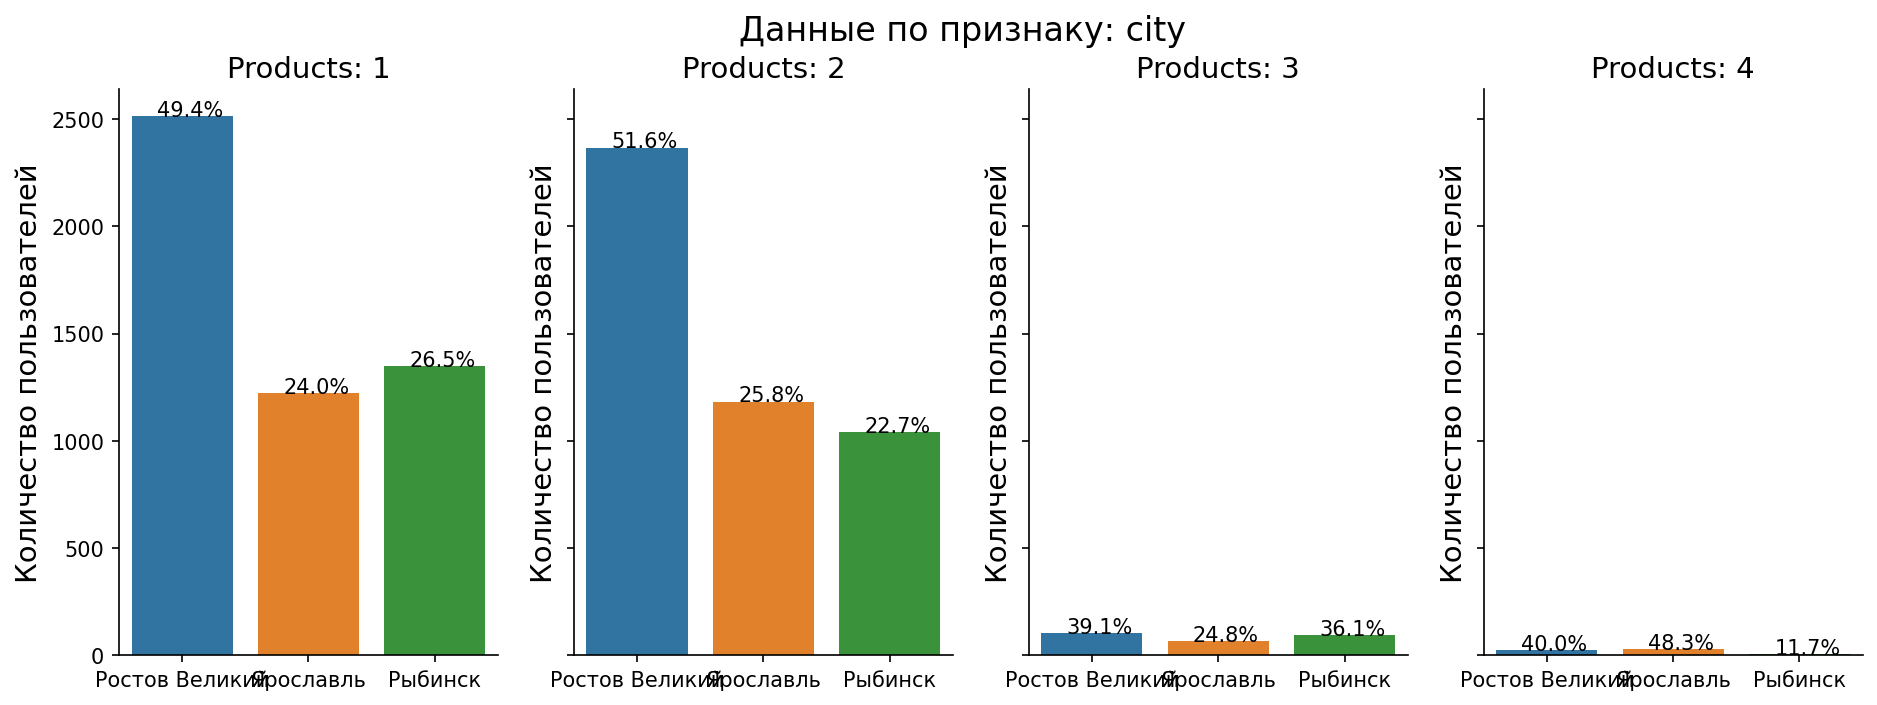

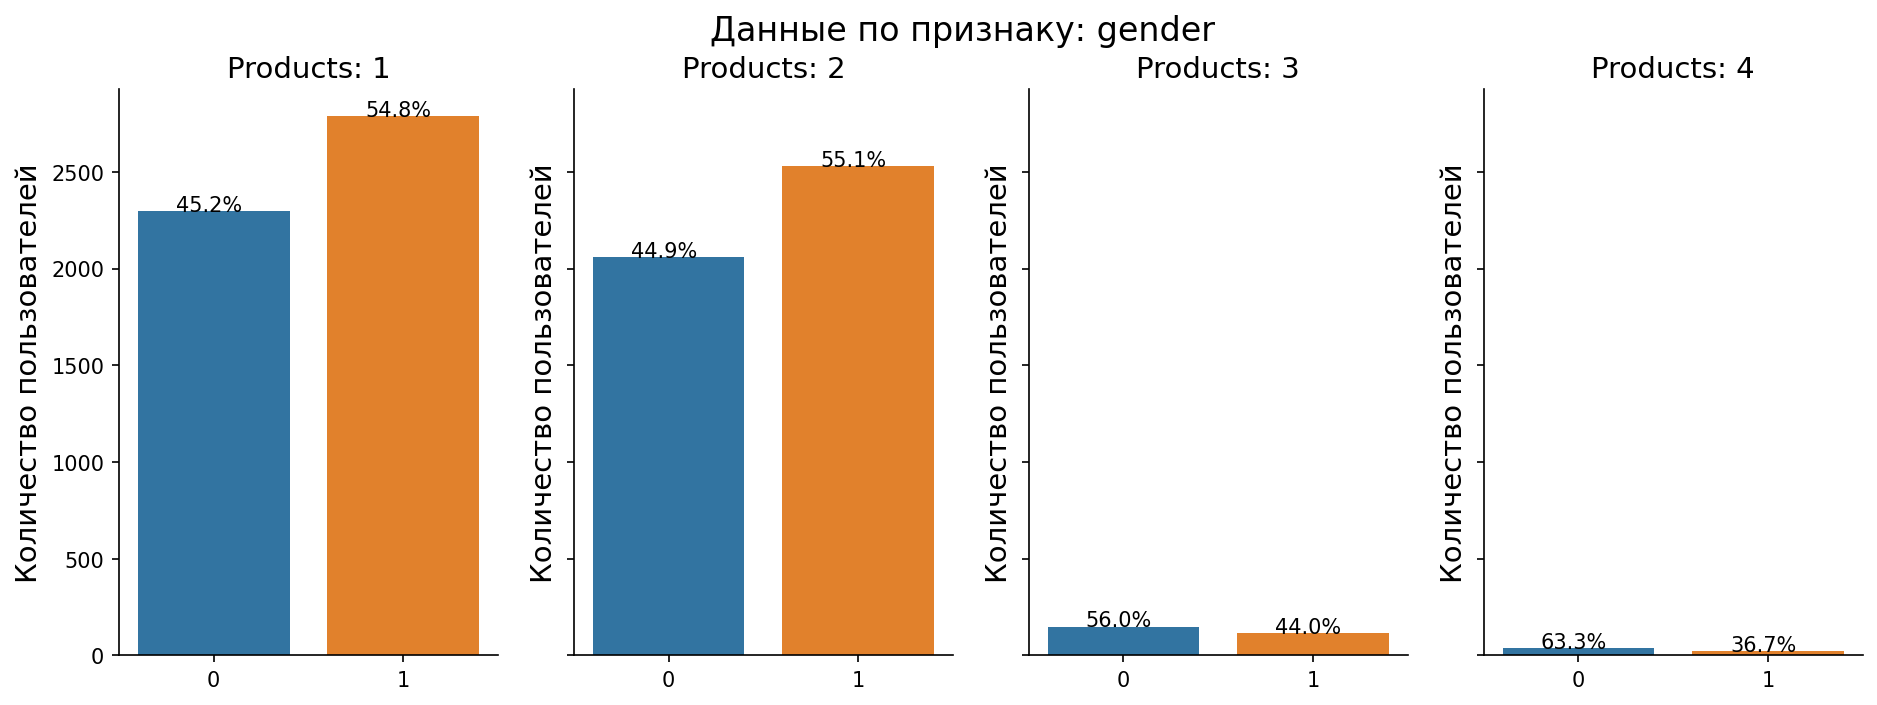

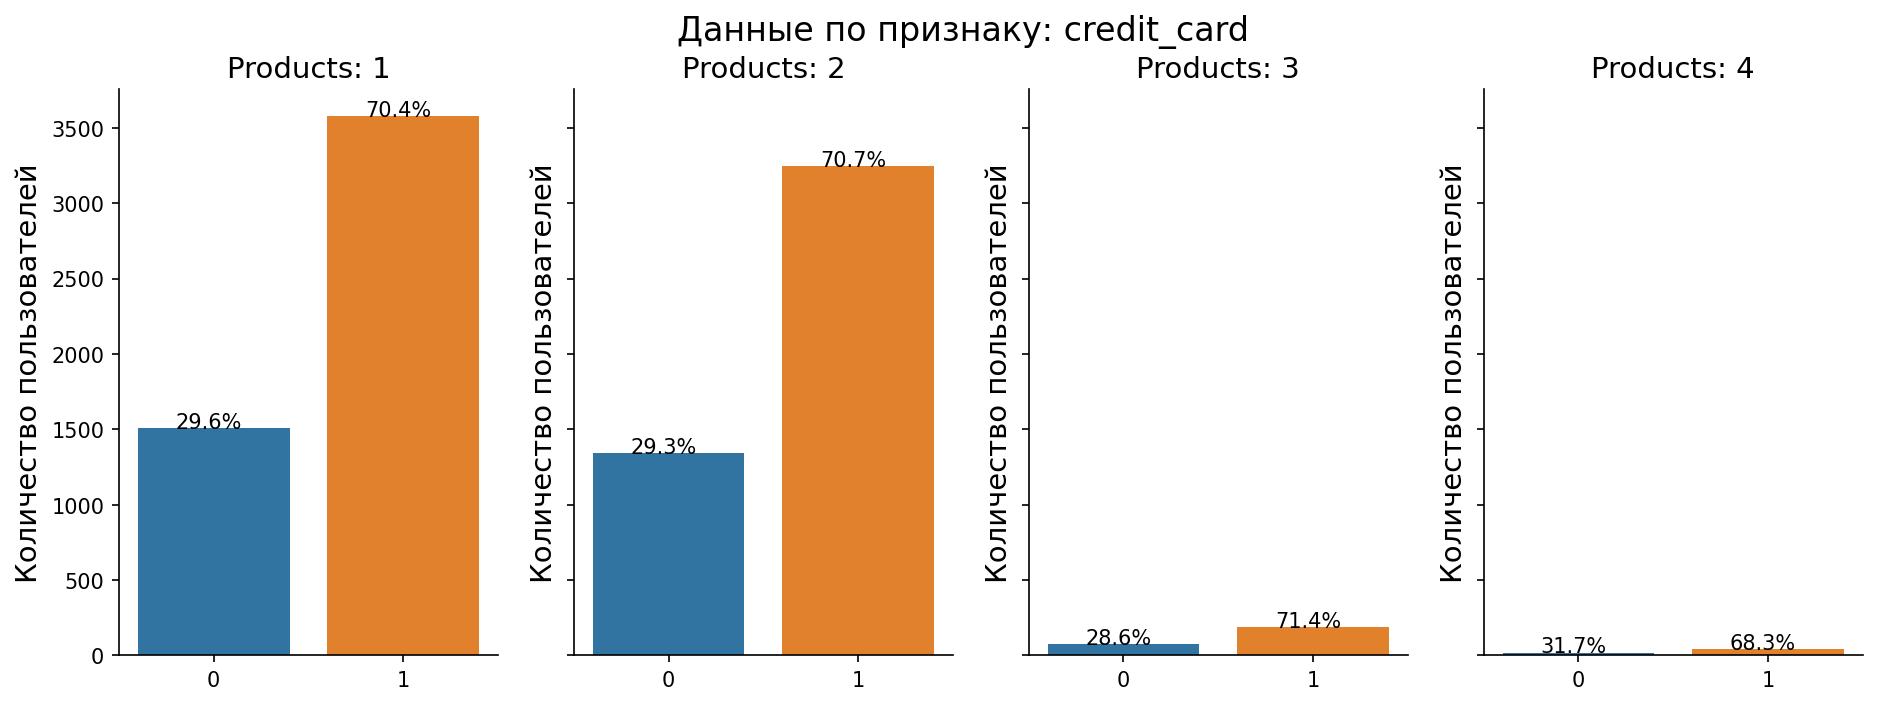

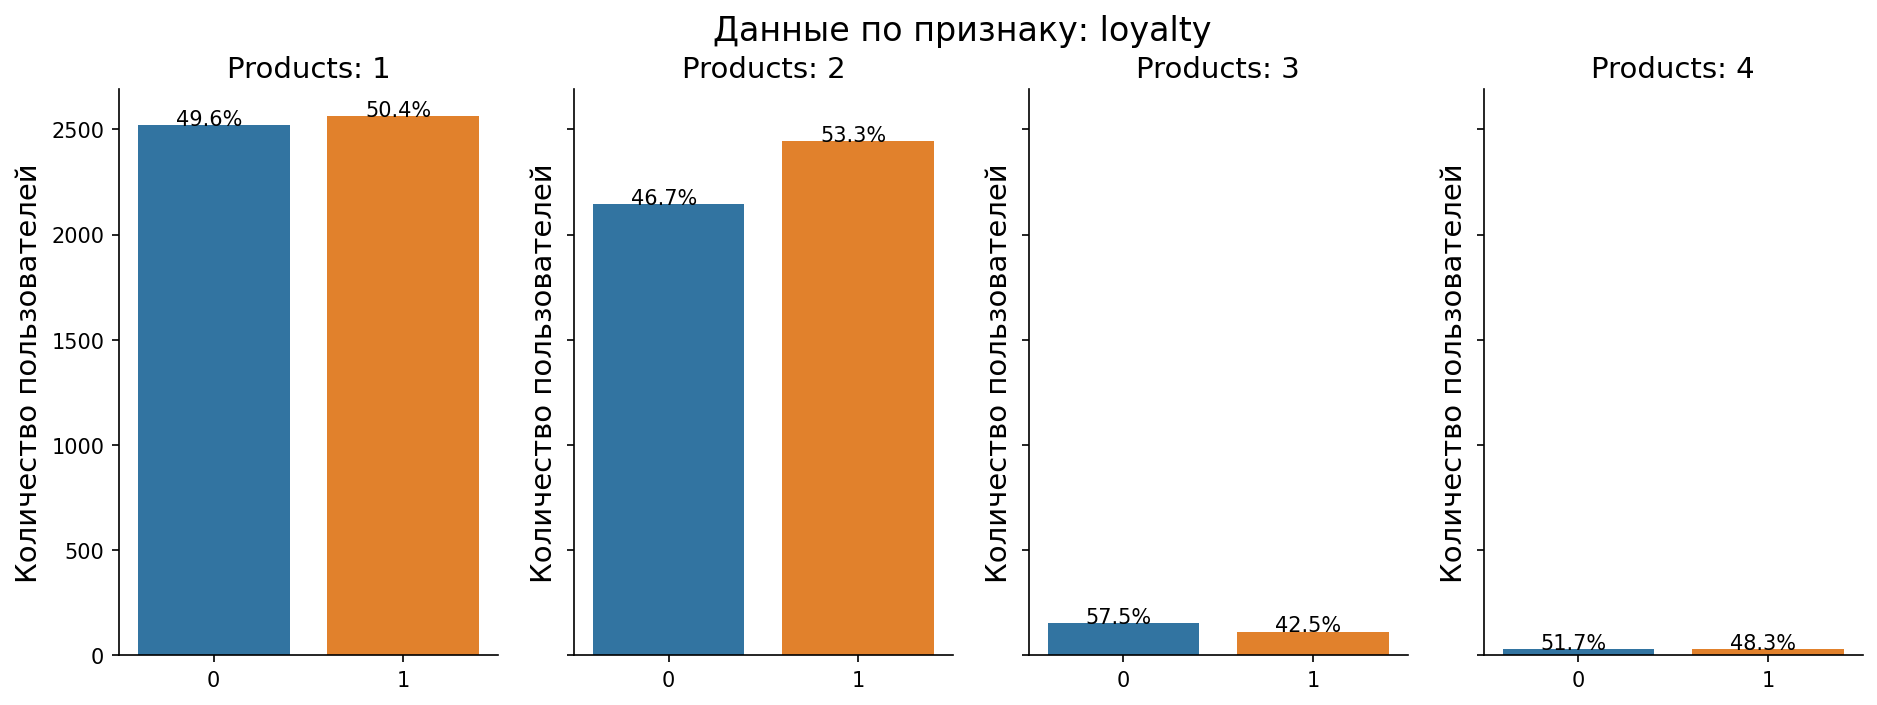

In [30]:
columns = ['city', 'gender', 'credit_card', 'loyalty']
for col in columns:
    fig, axes = plt.subplots(1, 4, figsize=(15, 5), dpi=150, sharey=True, sharex=True)
    fig.suptitle('Данные по признаку: ' + col, fontsize=16)
    ax = sns.countplot(x = col, data = data[data['products']==1], ax=axes[0])
    total = data[data['products']==1][col].shape[0]
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 4
            y = p.get_y() + p.get_height()
            ax.annotate(percentage, (x, y))
    #ax.grid(b=True, color='black', linestyle=':', axis='x', dashes=(1,5), alpha=0.5)
    ax.set_xlabel('')
    ax.set_ylabel('Количество пользователей', fontsize=14)
    ax.set_title('Products: 1', fontsize=14)
    ax = sns.countplot(x = col, data = data[data['products']==2], ax=axes[1])
    total = data[data['products']==2][col].shape[0]
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 4
            y = p.get_y() + p.get_height()
            ax.annotate(percentage, (x, y))
    #ax.grid(b=True, color='black', linestyle=':', axis='x', dashes=(1,5), alpha=0.5)
    ax.set_xlabel('')
    ax.set_ylabel('Количество пользователей', fontsize=14)
    ax.set_title('Products: 2', fontsize=14)
    ax = sns.countplot(x = col, data = data[data['products']==3], ax=axes[2])
    total = data[data['products']==3][col].shape[0]
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 4
            y = p.get_y() + p.get_height()
            ax.annotate(percentage, (x, y))
    #ax.grid(b=True, color='black', linestyle=':', axis='x', dashes=(1,5), alpha=0.5)
    ax.set_xlabel('')
    ax.set_ylabel('Количество пользователей', fontsize=14)
    ax.set_title('Products: 3', fontsize=14)
    ax = sns.countplot(x = col, data = data[data['products']==4], ax=axes[3])
    total = data[data['products']==4][col].shape[0]
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 4
            y = p.get_y() + p.get_height()
            ax.annotate(percentage, (x, y))
    #ax.grid(b=True, color='black', linestyle=':', axis='x', dashes=(1,5), alpha=0.5)
    ax.set_xlabel('')
    ax.set_ylabel('Количество пользователей', fontsize=14)
    ax.set_title('Products: 4', fontsize=14)
    sns.despine()
    plt.show()

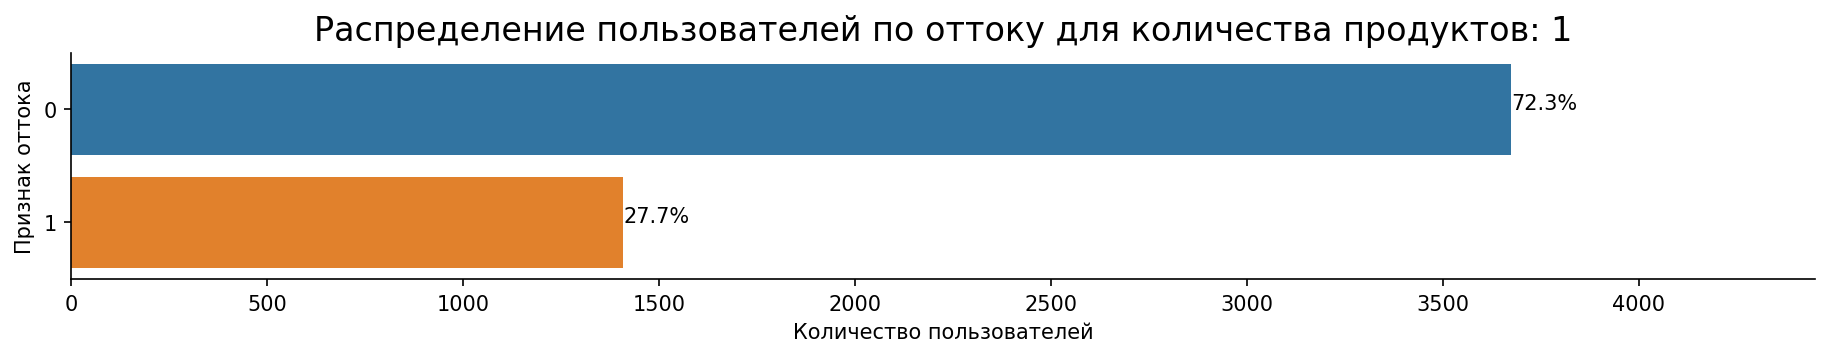

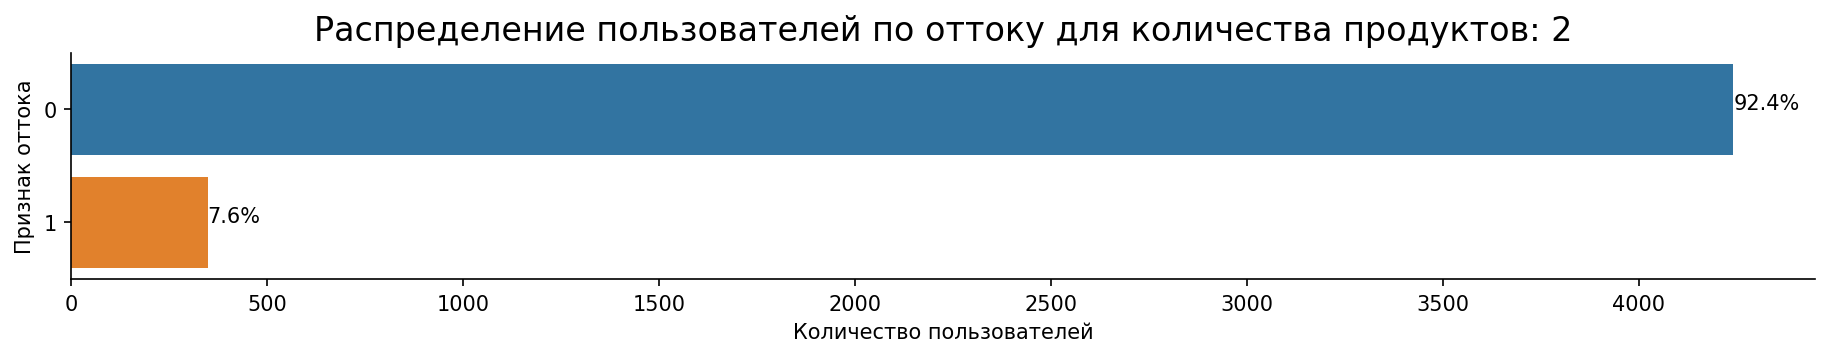

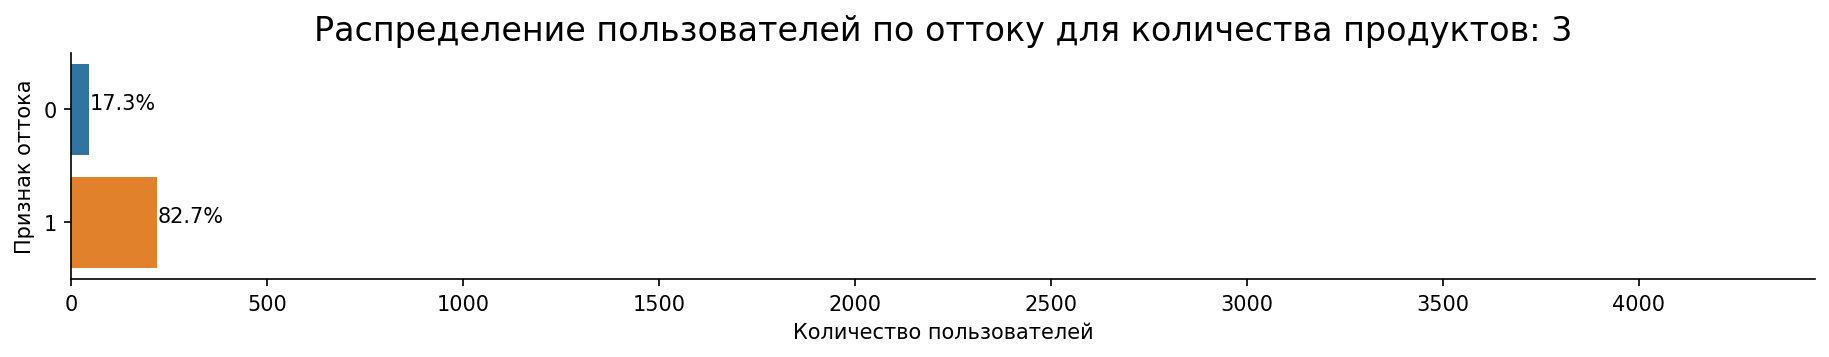

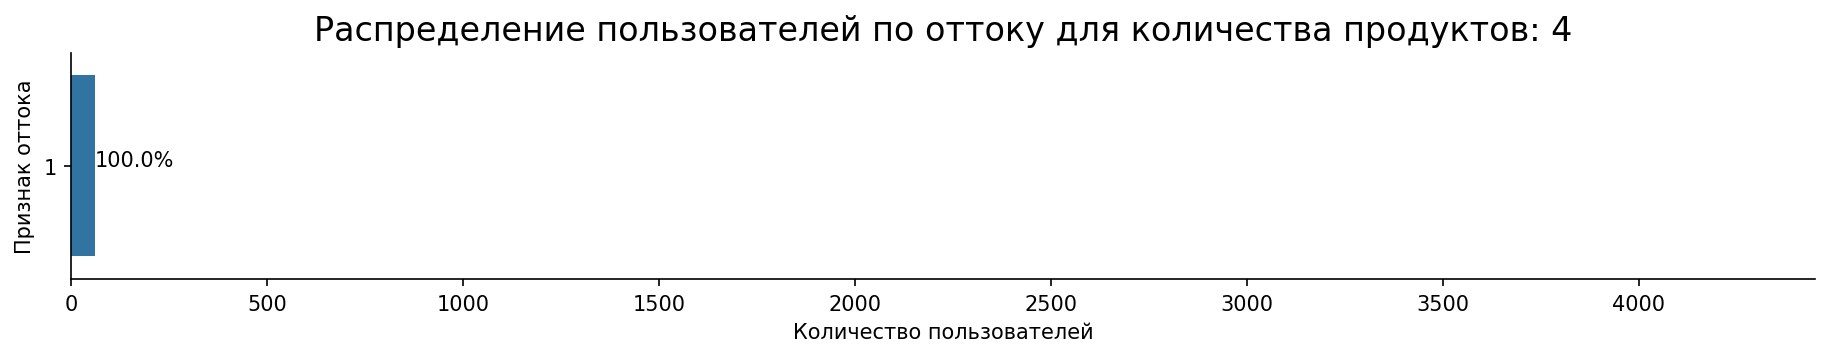

In [31]:
for i in [1, 2, 3, 4]:
    fig = plt.figure(figsize=(15, 2), dpi=150)
    ax = sns.countplot(y='churn', data=data[data['products'] == i])
    total = data[data['products'] == i].shape[0]
    #ax.grid(b=True, color='black', linestyle=':', axis='x', dashes=(1,5), alpha=0.5)
    ax.set_title('Распределение пользователей по оттоку для количества продуктов: {}'.format(i), fontsize=16)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width() / total)
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))

    ax.set_xlabel('Количество пользователей')
    ax.set_ylabel('Признак оттока')
    ax.set_xlim([0, 4450])
    sns.despine()
    plt.show()

<div class="alert alert-success">
<font color='black'>
<br><b>Проанализируем как отличаются признаки по количетсву продуктов:</b>
<br><b>Один продукт:</b>
<br>-Отточных клиентов - 28%:
<br>-50 % пользователей - c повышенной автивностью;
<br>-Средняя зарплата ниже, чем у пользователей с другим количеством продуктов;
<br>-Среднее количество объектов в собственности меньше, чем у других пользователей.
<br><b>Два продукта:</b>
<br>-Самый низкий процент отточных клиентов среди пользователей - 8%;
<br>-Самая высокая активность среди клиентов;
<br>-Средний возраст клиентов ниже аналогичных показателей других групп;
<br><b>Три продукта:</b>
<br>- Высокий процент отточных клиентов - 83%;
<br> - Низкий показатель активности - 43%
<br><b>Четыре продукта:</b>
<br>-Самый высокй процент отточных клиентов -  100%
<br>-Наиболее возрастная группа - средний возраст более 45 лет;
<br>-Имеет самый низкий показатель по наличию кредитной карты среди остальных групп.
<br>-По общему количеству клиентов лидирует Ярославль. На втором месте - Ростов Великий, замыкает рейтинг - Рыбинск. Больше всего пользователей в каждом из городов - с одним продуктом. Доля клиентов тремя и более продуктами очень мала одинаково во всех городах.</font></div>

### Проверка статистических гипотез.

Для начала нужно проверить, подходят ли наши выборки для проверки статистических гипотез. Найдем, на сколько отличается количество пользователей в группах, изучим распределение данных.
Уровень значимости зададим обычный: alpha = .05

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок.

Для подтверждения гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам иcпользуется метод st.stats.ttest_ind.

Если p-value будет меньше выбранного уровня значимости alpha = .05, то нулевую гипотезу о равенстве средних отвергнем. В противном случае делаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

#### Гипотеза №1. Доходы между клиентами которые пользуются двумя продуктами банка и теми кто пользуются одним одинаковы.

Для начала проверим данные на нормальность распределения внутри групп клиентов с одним и двумя продуктами. Для этого применим критерий Шапиро-Уилка. Для этой проверки нулевая гипотеза (H0) будет: "Данные распрелены нормально". Следовательно альтернативная гипотеза (H1) будет звучать как: "Распределение данных не нормально"

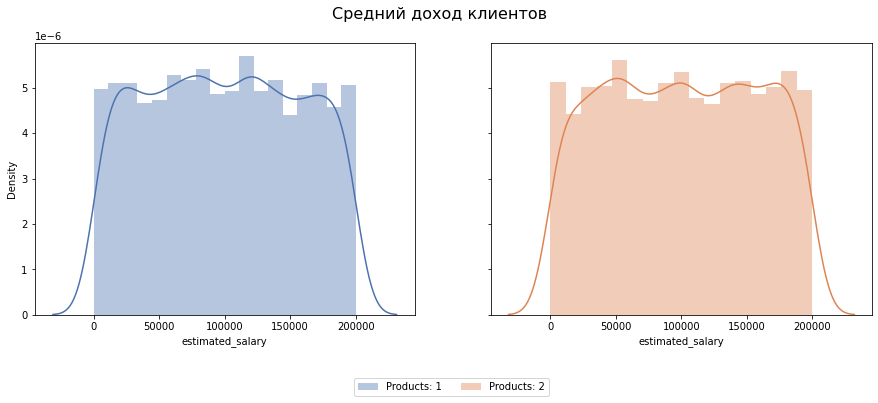

p-значение:  3.016011142283786e-36
Отвергаем нулевую гипотезу: распределение не нормально
p-значение:  2.1702207154579243e-35
Отвергаем нулевую гипотезу: распределение не нормально


In [32]:
# Из таблици со статистикой по пользователям выделим два датасета с зарплатами клиентов по группам по количеству продуктов
product_1 = data.loc[data.loc[:,'products'] == 1]['estimated_salary']
product_2 = data.loc[data.loc[:,'products'] == 2]['estimated_salary']

# Отобразим распреления зарплат по группам
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)
fig.suptitle('Средний доход клиентов', fontsize=16)
sns.distplot(a = product_1, color="#4c72b0" , ax=axes[0], label='Products: 1')
sns.distplot(a = product_2, color="#de8452" , ax=axes[1], label='Products: 2')
fig.legend(bbox_to_anchor=(0.511, -0.1), loc='lower center', ncol=4, borderaxespad=0)

plt.show()

alpha = 0.05  # критический уровень статистической значимости
products = [product_1, product_2]
for i in products:
    results = st.shapiro(i)
    p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: распределение не нормально')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

P-value для для обеих совокупностей сильно меньше критического уровня статистической значимости, а значит, что данные в обеих совокупностях распределены не нормально. Поэтому возпользуемся непараметрическим тестом st.mannwhitneyu().

Введем основную и альтернативную гипотезы:
<br> Н0-Доходы между клиентами которые пользуются двумя продуктами банка и теми кто пользуются одним одинаковы
<br> Н1-Доходы между клиентами которые пользуются двумя продуктами банка и теми кто пользуются одним отличаются

In [33]:
# Зададим критический уровень статистической значимости
alpha = 0.05    # критический уровень статистической значимости
                # если p-value окажется меньше него - отвергнем гипотезу

results = st.mannwhitneyu(data.query('products == 1')['estimated_salary'], data.query('products == 2')['estimated_salary'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.4079566651927651
Не получилось отвергнуть нулевую гипотезу


Статистически значимых различий в среднем доходе нет. P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу нет.

#### Гипотеза №2. Возраст между клиентами которые пользуются двумя продуктами банка и теми кто пользуются одним одинаков.

Для начала проверим данные на нормальность распределения внутри групп клиентов с одним и двумя продуктами. Для этого применим критерий Шапиро-Уилка. Для этой проверки нулевая гипотеза (H0) будет: "Данные распрелены нормально". Следовательно альтернативная гипотеза (H1) будет звучать как: "Распределение данных не нормально"

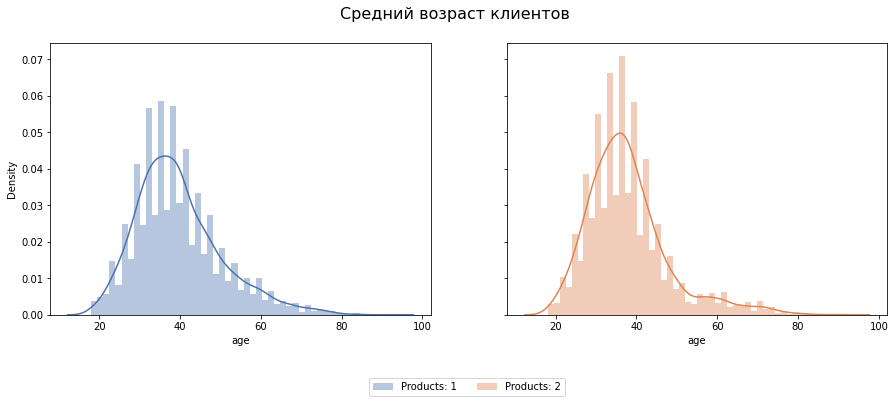

p-значение:  9.106582681074756e-37
Отвергаем нулевую гипотезу: распределение не нормально
p-значение:  7.286752014489049e-44
Отвергаем нулевую гипотезу: распределение не нормально


In [34]:
# Из таблици со статистикой по пользователям выделим два датасета с зарплатами клиентов по группам по количеству продуктов
product_1 = data.loc[data.loc[:,'products'] == 1]['age']
product_2 = data.loc[data.loc[:,'products'] == 2]['age']

# Отобразим распреления зарплат по группам
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)
fig.suptitle('Средний возраст клиентов', fontsize=16)
sns.distplot(a = product_1, color="#4c72b0" , ax=axes[0], label='Products: 1')
sns.distplot(a = product_2, color="#de8452" , ax=axes[1], label='Products: 2')
fig.legend(bbox_to_anchor=(0.511, -0.1), loc='lower center', ncol=4, borderaxespad=0)

plt.show()

alpha = 0.05  # критический уровень статистической значимости
products = [product_1, product_2]
for i in products:
    results = st.shapiro(i)
    p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: распределение не нормально')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

P-value для для обеих совокупностей сильно меньше критического уровня статистической значимости, а значит, что данные в обеих совокупностях распределены не нормально. Поэтому возпользуемся непараметрическим тестом st.mannwhitneyu().

Введем основную и альтернативную гипотезы:
<br> Н0-Возраст между клиентами которые пользуются двумя продуктами банка и теми кто пользуются одним одинаков
<br> Н1-Возраст между клиентами которые пользуются двумя продуктами банка и теми кто пользуются одним отличается

In [35]:
# Зададим критический уровень статистической значимости
alpha = 0.05    # критический уровень статистической значимости
                # если p-value окажется меньше него - отвергнем гипотезу

results = st.mannwhitneyu(data.query('products == 1')['age'], data.query('products == 2')['age'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.248185983698308e-22
Отвергаем нулевую гипотезу


<div class="alert alert-success">
<font color='black'>    
<b>Выводы по проверкам статистических гипотез:</b>  
<br>- Нет статистически значимой разницы между примерной заработная платой клиентов которые пользуются двумя продуктами банка и теми кто пользуются одним;
<br>- Есть статистически значимая разница между возрастом клиентов которые пользуются двумя продуктами банка и теми кто пользуются одним;
.</font></div>

### Выводы и рекомендации.

<div class="alert alert-success">
<font color='black'>    
<b>По итогу исследования можно сделать вывод по факторам влияющих на отток:</b>
<br> - Cреди женщин процент "отточных клиентов" выше, чем среди мужчин;
<br> - Клиенты, использующие более 2-х продуктов уходят в отток больше всего;
<br> - Среди не активных клиентов отток ожидаемо выше;
<br> - По наличию кредитной карты отношение "отточных" клиентов и тех, кто остался на сапоставимых уровнях.
<br><b> По количеству используемых продуктов провели сегментацию, со следующими характеристиками:</b>
<br><b>Один продукт:</b>
<br>-Отточных клиентов - 28%:
<br>-50 % пользователей - c повышенной автивностью;
<br>-Средняя зарплата ниже, чем у пользователей с другим количеством продуктов;
<br>-Среднее количество объектов в собственности меньше, чем у других пользователей.
<br><b>Два продукта:</b>
<br>-Самый низкий процент отточных клиентов среди пользователей - 8%;
<br>-Самая высокая активность среди клиентов;
<br>-Средний возраст клиентов ниже аналогичных показателей других групп;
<br><b>Три продукта:</b>
<br>- Высокий процент отточных клиентов - 83%;
<br> - Низкий показатель активности - 43%
<br><b>Четыре продукта:</b>
<br>-Самый высокй процент отточных клиентов -  100%
<br>-Наиболее возрастная группа - средний возраст более 45 лет;
<br>-Имеет самый низкий показатель по наличию кредитной карты среди остальных групп.
<br><b>Выводы по проверкам статистических гипотез:</b>  
<br>- Нет статистически значимой разницы между примерной заработная платой клиентов которые пользуются двумя продуктами банка и теми кто пользуются одним;
<br>- Есть статистически значимая разница между возрастом клиентов которые пользуются двумя продуктами банка и теми кто пользуются одним.
<br><b>Рекомендации:</b>
<br>1) Для клиентов, имеющих 3-4 продукта необходимо предложить провести реструктуризацию долга если речь идет о кредитных продуктах, с некоторым снижением процентной ставки. Эти меры помогут удержать клиентов, т.к. снизят нагрузку на клиента;
<br>2) За счет внедрения и предложения новых продуктов повышать активность клиетов с низким показателем активности;
<br>3) Стоит обратить внимание на категорию клиентов женского пола в возрасте от 40 до 50 лет, разработать нишевые продукты, возможно карты с повышеным уровнем лояльности в виде кешбека; </font></div>